In [1]:
import sys
import seaborn as sns
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
import scipy
from scipy import stats 
import IS as isfn
import network_mod as netfn

sns.reset_orig()
#plt.style.use('dark_background')
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

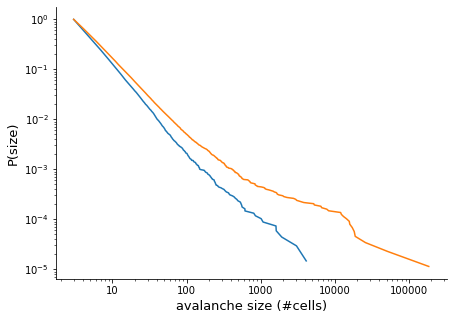

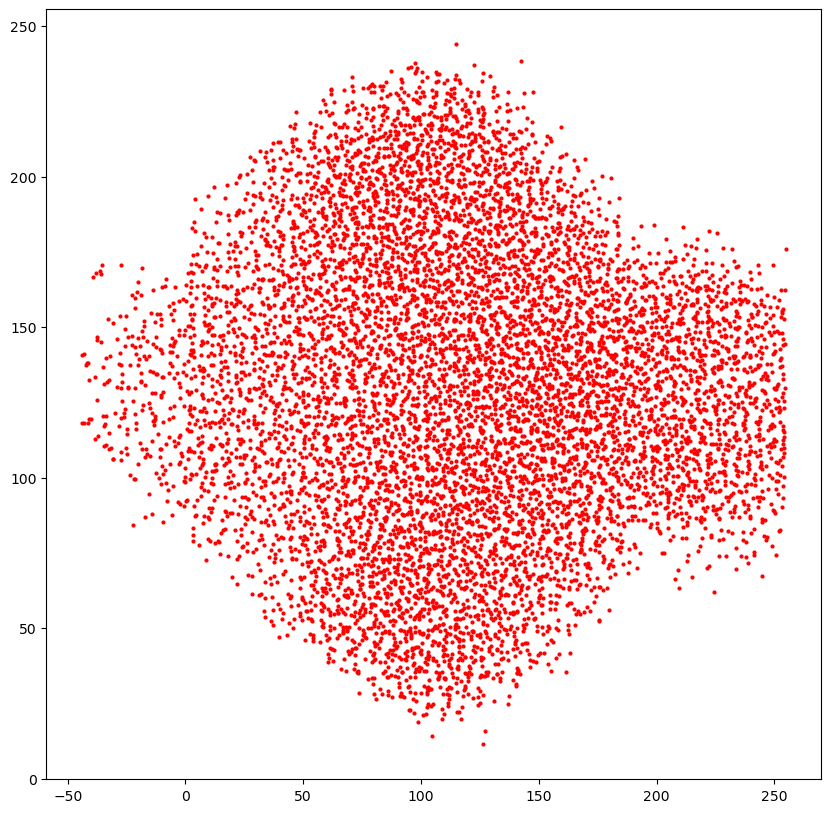

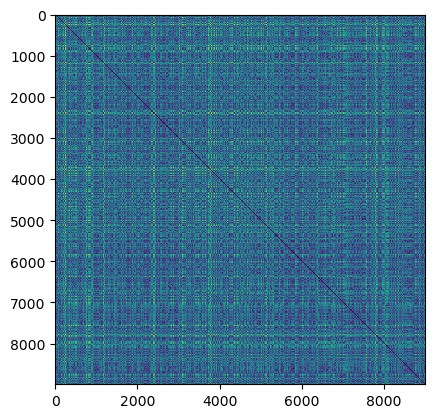

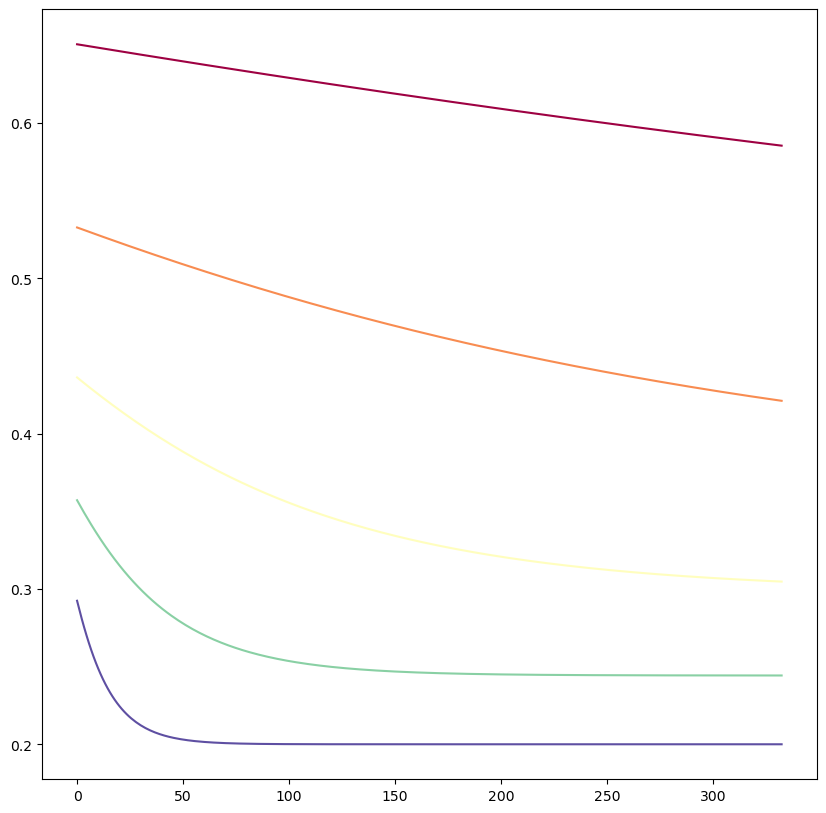

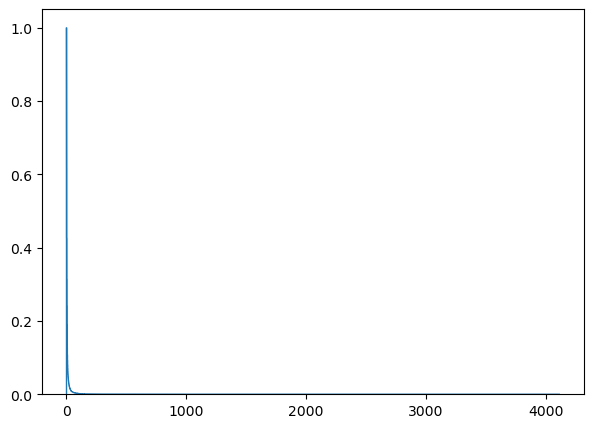

In [2]:
import brian2 as b2
%matplotlib inline
from random import sample
from numpy import random


#set parameters of model

N_extern=1000 #number of presynaptic excitatory poisson neurons - if None, computed as N_Excit*connection prob
poisson_input_rate= 10. * b2.Hz #poisson rate of external population
w_external=0.1 * b2.mV #synaptic weight of excitatory external possion neurons onto all neurons - if None w_external set to w_0

w0= 0.1 * b2.mV #synaptic strength J
synaptic_delay= 1.5 * b2.ms #delay between presynaptic spike and postsynaptic increase
v_rest=0. * b2.mV #Resting potential
v_reset= 10. * b2.mV #Reset potential
firing_threshold= +20. * b2.mV #Spike threshold
membrane_time_scale= 20. * b2.ms #tau
abs_refractory_period= 2.0 * b2.ms #absolute refractory period

def bin_data(spikes, N):
    bin_dat = np.zeros((N, int(sim_time/1)))
    for i in range(N):
        bin_dat[i][np.asarray(np.unique(np.around(spikes[i], 3))*1000).astype(int) - 1] = 1
    
    return(bin_dat)





# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))[:1]
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))[:1]

choose = 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1)
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1)

axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)

node = sorted(glob.glob('knodes*'))
fig,axarr = plt.subplots(figsize = (10,10))
nodes = np.load(node[0])
axarr.scatter(nodes[:,0], nodes[:,1], s = 4, color = 'red' , alpha = 1)
plt.show()

dist = euclidean_distances(nodes)
plt.imshow(dist)
plt.show()


# Simple sigmoid function to 'soften' the exponential
#-------------------------------------------------------------------------------
def sig(x):
  return 1 / (1+np.exp(-x))

# Conversion from distance to edge weights, scaled (itself exponentially) by s
#-------------------------------------------------------------------------------
def dist2edge(distance, divisor, s):
  edgeweights = np.exp(s/5)*sig(np.exp(-soften/np.exp(s)*distance))/divisor
  return edgeweights

#S parameters
Nsteps  = 5
divisor = 2.5
soften = 0.07
s_vals   = np.array(np.linspace(0, 4, Nsteps)).tolist()

#Plot each s value
fig, ax = plt.subplots(1, figsize=(10,10))
colors  = cm.Spectral_r(np.linspace(0,1,Nsteps))
distance = np.linspace(0, np.max(dist), 300)
for s in range(len(s_vals)):
  ax.plot(distance, dist2edge(distance, divisor, s_vals[s]), c=colors[s])
plt.show()

#Calculate number of simulatons to do - to have 95% chance of generating maximum avalanche
def num_sims(empirical, cutoff):
    import matplotlib.pyplot as plt
    import math
    fig, axarr = plt.subplots(figsize = (7,5))
    hist = axarr.hist(empirical, bins = 100000, density = True, histtype = 'step', cumulative = -1)
    p = 1-(10**(np.log10(hist[0])[np.where(np.log10(hist[1]) > np.log10(cutoff))[0][0]])) #probability of getting avalanches of size cutoff or smaller
    number = 0.05 
    base = p
    exponent = int(math.log(number, base)) #number of simulations as the power to which p is raised to get 95% probability 
    return(exponent)

#Simulation parameters
#======================
cutoff = 1000
n_sims= num_sims(bln_vec, cutoff)

#BUILD WEIGHT MATRIX
#===================
#===================
# Simple sigmoid function to 'soften' the exponential
#===========================
def sig(x):
#===========================
    import numpy as np
    sig_output = 1 / (1+np.exp(-x))
    return(sig_output)

# Conversion from distance to edge weights, scaled (itself exponentially) by s
#====================================
def dist2edge(distance, divisor, soften, s):
#===================================
    import numpy as np
    edge_weight_out = np.exp(s/5)*sig(np.exp(-soften/np.exp(s)*distance))/divisor
    return(edge_weight_out)  

#===========================
def adjmat_generate(curr_mat, s, edge_density, divisor, soften):
#===========================
    import numpy as np
    import copy
    mat = np.zeros((dist.shape))

    #curr_mat = net_generate(edge_density).A #matrix to calculate cycles

    [rows, cols]    = np.where(np.triu(curr_mat) == 1) 
    for e in range(len(rows)):
        edge_weight = dist2edge(dist[rows[e], cols[e]], divisor, soften, s)
        mat[rows[e], cols[e]] = edge_weight 
        mat[cols[e], rows[e]] = edge_weight
    adj_mat = copy.deepcopy(mat)

    return(adj_mat)
    
    
import brian2 as b2
from random import sample
from numpy import random



def bin_data(spikes, N):
    bin_dat = np.zeros((N, int(sim_time/1)))
    for i in range(N):
        bin_dat[i][np.asarray(np.unique(np.around(spikes[i], 3))*1000).astype(int) - 1] = 1
    
    return(bin_dat)



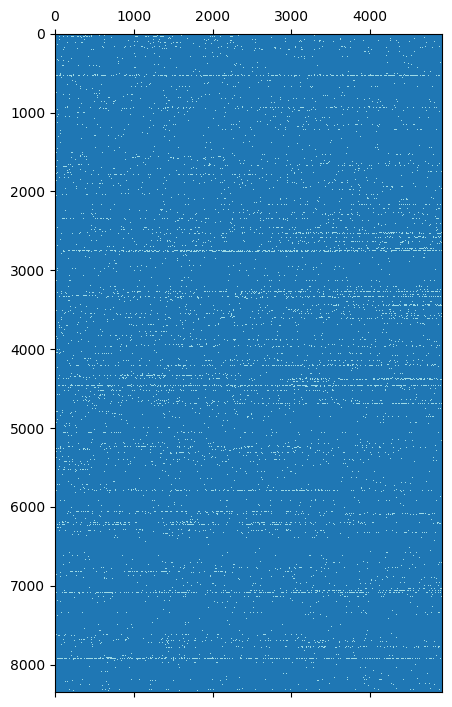

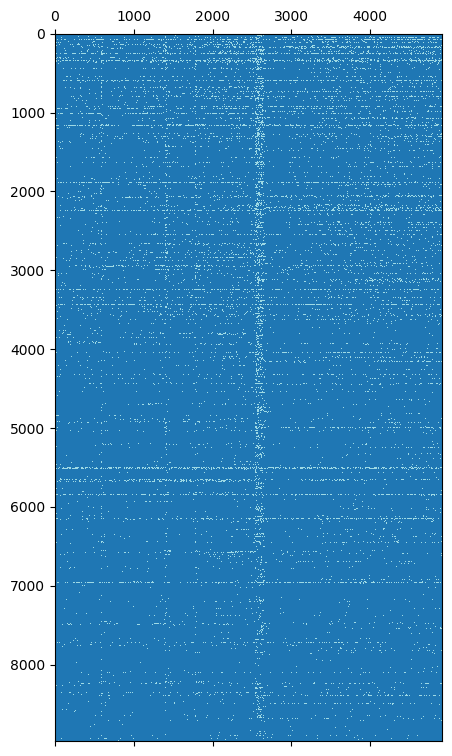

In [3]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
bln_bin = sorted(glob.glob('*-02*BLN*0.590*binarised.npy*')) #iterated list - binarised trace
ptz_bin = sorted(glob.glob('*-02*PTZ20*0.590*binarised.npy*')) #iterated list - binarised trace

fig, ax = plt.subplots(figsize= (5,10))
ax.matshow(np.load(bln_bin[0]), cmap = 'tab20')
plt.show()
fig, ax = plt.subplots(figsize= (5,10))
ax.matshow(np.load(ptz_bin[0]), cmap = 'tab20')
plt.show()

In [41]:
len(range_T)

5000

# Implement spiking networks

In [85]:
#LIF NEURON

#set parameters
t = 100 #simulation time
dt = 0.1 #time step
t_bins = np.arange(0, T, dt) #time bins
t_ref = 2 #refractory period
tau_m = 10 # membrane time constant - time taken to decay to 36% of max value = capacitence / leak

v_init = -75  #initial voltage
v_reset = -75 #reset voltage after spike
v_rest = -75 #equilibrium potential - resting potential

v_th = -55  #voltage spike threshold
g_L = 10 #leak 

I = 400 #input current

# Initialize voltage and current
v_vec = np.zeros(len(t_bins)) #voltage values over time
v_vec[0] = v_init #voltage at time 0
I = I * np.ones(len(t_bins)) #constant injected current 
t_ref_count = 0  # the count for refractory duration

# Simulate 
spike_vec = []  # record spike times

#loop through each time step
for it in range(len(t_bins) - 1):
    if tr > 0:  # check for refractoriness
        v[it] = v_reset
        t_ref_count = t_ref_count - 1 #iterate until t_ref_count = 0
        
    elif v[it] >= v_th:  # reset voltage and record spike event
        spike_vec.append(it)
        v[it] = v_reset
        t_ref_count = t_ref / dt #convert refractory time to bins

    # calculate the increment of the membrane potential
    dv = (-1*(v[it] - v_rest) + I[it] / g_L) * dt/tau_m

    # update the membrane potential
    v[it+1] = v[it] + dv

spike_vec = np.array(spike_vec) * dt #convert into time bins

(-80, -40)

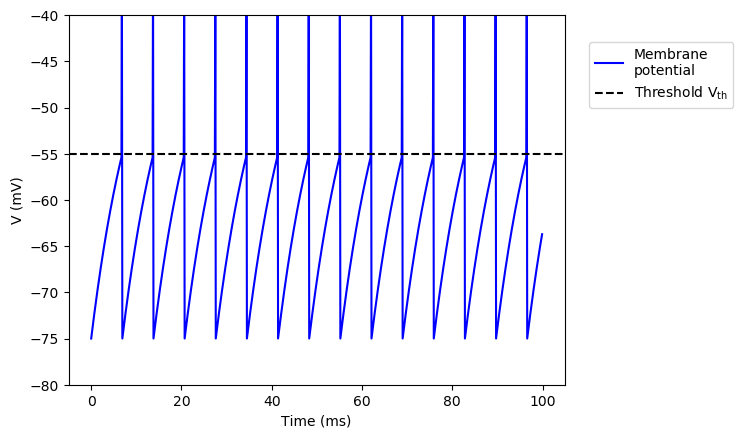

In [86]:
if spike_vec.size:
    sp_num = (spike_vec / dt).astype(int) - 1
    v[sp_num] += 20  # draw nicer spikes

plt.plot(range_T, v, 'b')
plt.axhline(v_th, 0, 1, color='k', ls='--')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')
plt.legend(['Membrane\npotential', r'Threshold V$_{\mathrm{th}}$'],
         loc=[1.05, 0.75])
plt.ylim([-80, -40])

In [ ]:
#CONNECT UP

In [15]:
def izhinet(params: dict, in_current: np.ndarray, runtime: int, deltat: float) -> np.ndarray:
  """Simulate Izhikevich Networks with given parameters."""
  # params['ntypes'] (N,) True for excitatory, False for inhibitory, the x from the equations
  # params['nrands'] (N,) the r
  # params['weights'] (N, N) connecting weights
  # params['delays'] (N, N) connection delays
  # in_current (B, N) input current, where B is batch size so we can simulate the same network
  # with different inputs.
  ntypes = params['ntypes'] # (N,)
  nrands = params['nrands'] # (N,)
  # We will look back in time, so need to transpose these. The original parameters tell us
  # for example the delay from ith neuron to jth neuron. We need the delay back in time so
  # we can compute how further back we need to look for jth neuron to receive from the ith neuron
  recv_weights = params['weights'].T # (N, N)
  recv_delays = params['delays'].T # (N, N)
  # ---------------------------
  # Setup variables
  bs = in_current.shape[0] # batch size B
  ns = ntypes.shape[0] # number of neurons N
  ns_range = np.arange(ns) # (N,)

  # This is the variable we will store our spikes / firings
  # it reads for every batch input, for every neuron, record the time it fired
  firings = np.zeros((bs, ns, runtime), dtype=np.bool) # (B, N, T)

  # Neuron parameters as described in the paper
  a = ntypes*0.02 + (1-ntypes)*(0.02+0.08*nrands) # (N,)
  b = ntypes*0.2 + (1-ntypes)*(0.25-0.5*nrands) # (N,)
  nrsquared = nrands*nrands # (N,)
  c = ntypes*(-65+15*nrsquared) + (1-ntypes)*-65 # (N,)
  d = ntypes*(8-6*nrsquared) + (1-ntypes)*2 # (N,)
  a, b, c, d = [np.repeat(x[None], bs, axis=0) for x in (a, b, c, d)] # (B, N)

  # Runtime state of neurons, v is the membrane voltage
  v = np.ones((bs, ns), dtype=np.float32)*-65 # (B, N)
  u = v * b # (B, N)
  # ---------------------------
  for t in range(runtime): # milliseconds
    # Compute input current, we need to now take into account the contributions
    # of previously fired neurons and their delays. So if a neuron has fired
    # in the past it will take delays many time to send it. Here, we compute
    # how long it takes for a neuron (N,) to receive a spike from another neuron (N,)
    # which is captured by recv_delays (N,N)
    # To find the index of the neuron to check if it has fired, we compute t-recv_delays
    # that tells which index in the past we need to look at for every neuron
    past = t-recv_delays # (N, N)
    # This is okay because nothing has fired at the current time yet
    past[past < 0] = t # reset negative values to current time
    # Look back in time for neurons firing
    past_fired = firings[:, ns_range[None, :], past] # (B, N, N)
    icurrent = (past_fired*recv_weights).sum(-1) # (B, N)
    icurrent += in_current # (B, N)
    # ---------------------------
    fired = firings[..., t] # (B, N)
    # Integrate using the Euler Method, so 1 millisecond of activity is approximated
    # by 1/h many steps here.
    for _ in range(int(1/deltat)): # delta t to update differential equations
      # To avoid overflows with large input currents,
      # keep updating only neurons that haven't fired this millisecond.
      notfired = np.logical_not(fired) # (B, N)
      nfv, nfu = v[notfired], u[notfired] # (NF,), (NF,)
      # https://www.izhikevich.org/publications/spikes.pdf
      v[notfired] += deltat*(0.04*nfv*nfv + 5*nfv + 140 - nfu + icurrent[notfired]) # (B, N)
      u[notfired] += deltat*(a[notfired]*(b[notfired]*nfv - nfu)) # (B, N)
      # Update firings
      fired[:] = np.logical_or(fired, v >= 30) # threshold potential in mV
    # ---------------------------
    # Reset for next millisecond
    v[fired] = c[fired] # (F,)
    u[fired] += d[fired] # (F,)
  return firings

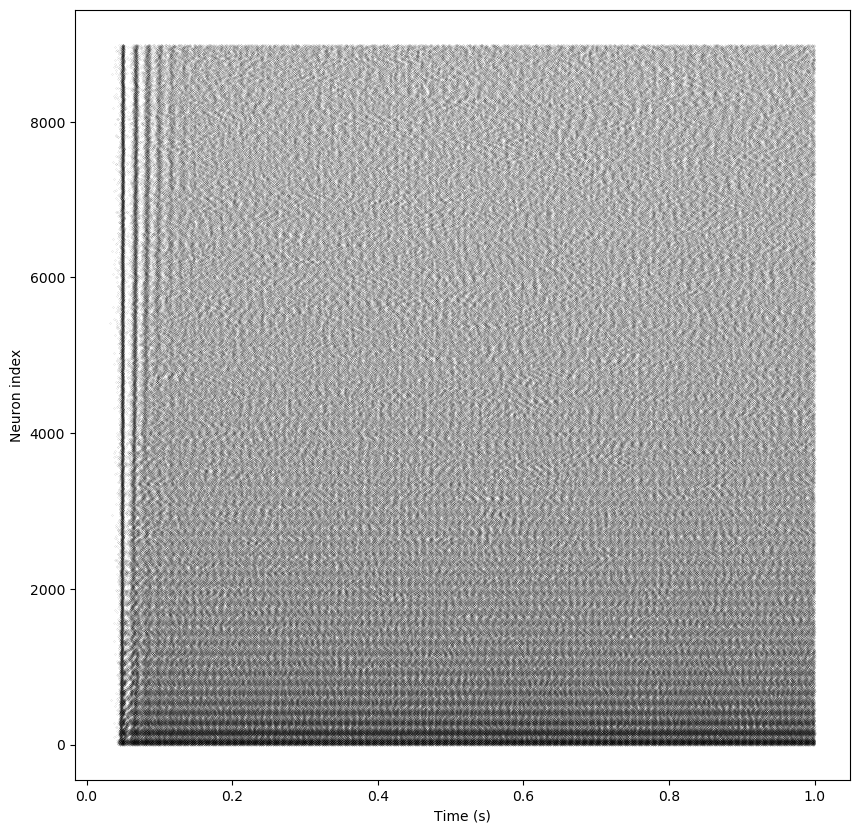

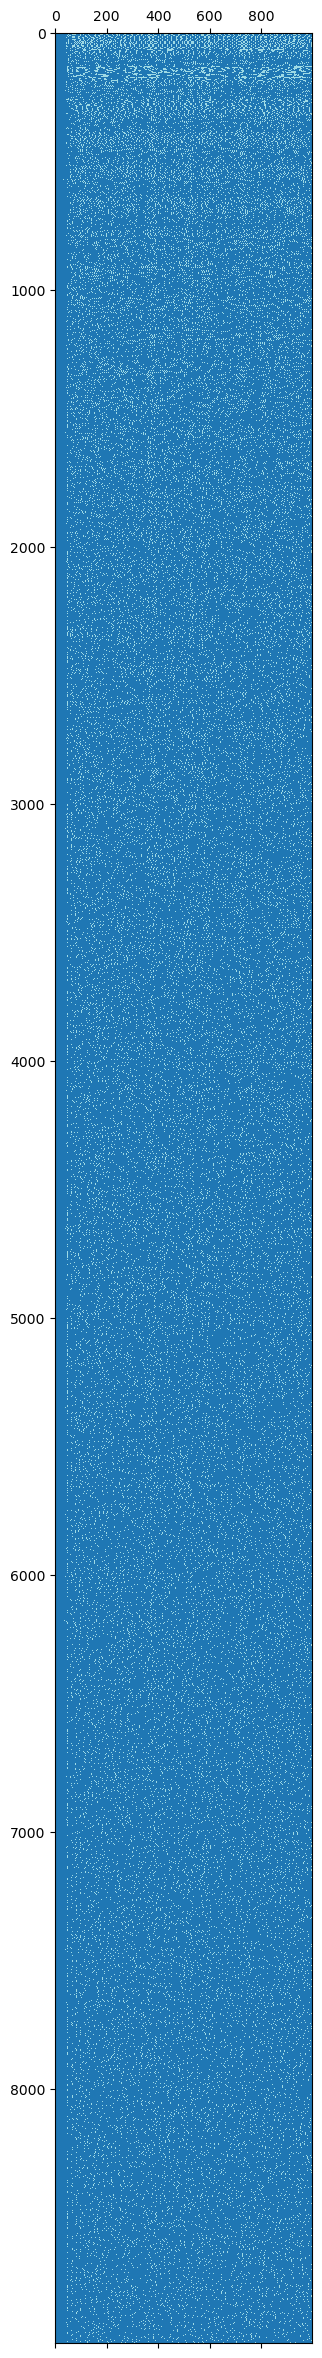

In [7]:
sim_time=1000 #simulation time

s = s_vals[2]
J_excit = 0.11 * b2.mV #synaptic strength J

k = 32
p = 0.3
curr = bap_netsim(dist).adjmat_generate(s, p, k, divisor, soften)
A = curr.A
W = curr.adj_mat


# record 
b2.start_scope()




# define dynamics for each cell
lif_dynamics = """
dv/dt = -(v-v_rest) / membrane_time_scale : volt (unless refractory)"""


#Build neuron group
N = nodes.shape[0]

network = b2.NeuronGroup(
    N, model=lif_dynamics,
    threshold="v>firing_threshold", reset="v=v_reset", refractory=abs_refractory_period,
    method="linear")

network.v = v_rest


#Build synapses
S = b2.Synapses(network, network, 'w:1', on_pre="v += J_excit", delay=synaptic_delay)

rows, cols = np.nonzero(A)
S.connect(i = rows, j = cols)

#Add weights
S.w = W[rows, cols]
external_poisson_input = b2.PoissonInput(target=network, target_var="v", N=N_extern,
                                          rate=poisson_input_rate, weight=w_external)

spike_monitor = b2.SpikeMonitor(network)
b2.run(sim_time*b2.ms)


### import matplotlib
fig, axarr = plt.subplots(figsize = (10,10))
plt.plot(spike_monitor.t, spike_monitor.i, '.k', markersize = 0.1)
plt.xlabel('Time (s)')
plt.ylabel('Neuron index');
plt.show()

bind_s011_k32_p03 = bin_data(spike_monitor.spike_trains(), N)

fig, ax = plt.subplots(figsize= (10,30))
ax.matshow(bind_s011_k32_p03, cmap = 'tab20')
plt.show()

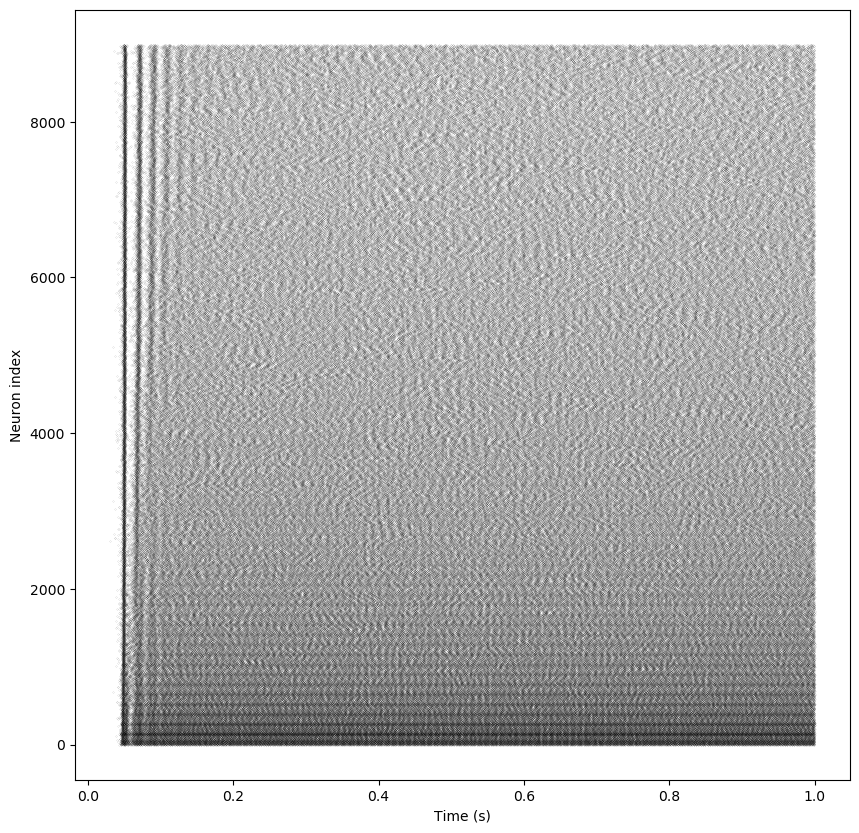

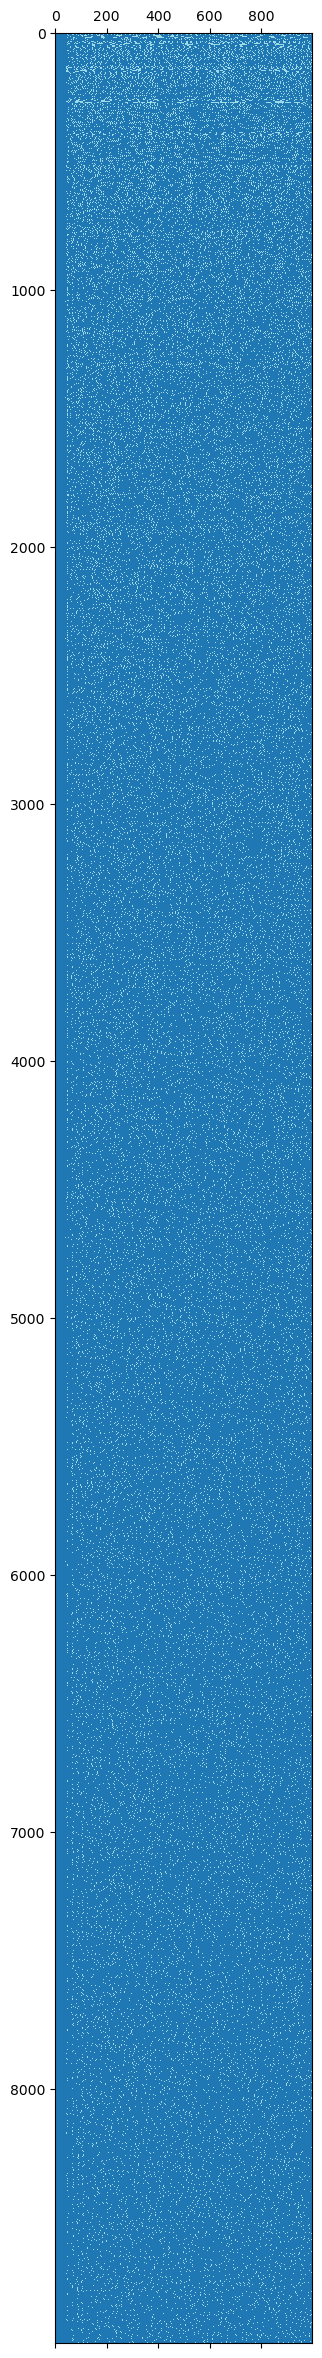

In [8]:
sim_time=1000 #simulation time

s = s_vals[2]
J_excit = 0.11 * b2.mV #synaptic strength J

k = 32
p = 0.8
curr = bap_netsim(dist).adjmat_generate(s, p, k, divisor, soften)
A = curr.A
W = curr.adj_mat


# record 
b2.start_scope()




# define dynamics for each cell
lif_dynamics = """
dv/dt = -(v-v_rest) / membrane_time_scale : volt (unless refractory)"""


#Build neuron group
N = nodes.shape[0]

network = b2.NeuronGroup(
    N, model=lif_dynamics,
    threshold="v>firing_threshold", reset="v=v_reset", refractory=abs_refractory_period,
    method="linear")

network.v = v_rest


#Build synapses
S = b2.Synapses(network, network, 'w:1', on_pre="v += J_excit", delay=synaptic_delay)

rows, cols = np.nonzero(A)
S.connect(i = rows, j = cols)

#Add weights
S.w = W[rows, cols]
external_poisson_input = b2.PoissonInput(target=network, target_var="v", N=N_extern,
                                          rate=poisson_input_rate, weight=w_external)

spike_monitor = b2.SpikeMonitor(network)
b2.run(sim_time*b2.ms)


### import matplotlib
fig, axarr = plt.subplots(figsize = (10,10))
plt.plot(spike_monitor.t, spike_monitor.i, '.k', markersize = 0.1)
plt.xlabel('Time (s)')
plt.ylabel('Neuron index');
plt.show()

bind_s011_k32_p08 = bin_data(spike_monitor.spike_trains(), N)

fig, ax = plt.subplots(figsize= (10,30))
ax.matshow(bind_s011_k32_p08, cmap = 'tab20')
plt.show()

In [10]:
nnb = neighbour(nodes, 0.16, 6000, [1, 1, 1])

Doing row 0 of 8990
Doing row 899 of 8990
Doing row 1798 of 8990
Doing row 2697 of 8990
Doing row 3596 of 8990
Doing row 4495 of 8990
Doing row 5394 of 8990
Doing row 6293 of 8990
Doing row 7192 of 8990
Doing row 8091 of 8990


In [11]:
bind_list = [bind_s011_k32_p03, bind_s011_k32_p08]

av_list = list(range(3))
for i in range(len(bind_list)):
    av_list[i] = avalanche(nnb, bind_list[i])

doing time step 0of1000for fish 
doing time step 100of1000for fish 
doing time step 200of1000for fish 
doing time step 300of1000for fish 
doing time step 400of1000for fish 
doing time step 500of1000for fish 
doing time step 600of1000for fish 
doing time step 700of1000for fish 
doing time step 800of1000for fish 
doing time step 900of1000for fish 


WARNING    /Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
 [py.warnings]


doing time step 0of1000for fish 
doing time step 100of1000for fish 
doing time step 200of1000for fish 
doing time step 300of1000for fish 
doing time step 400of1000for fish 
doing time step 500of1000for fish 
doing time step 600of1000for fish 
doing time step 700of1000for fish 
doing time step 800of1000for fish 
doing time step 900of1000for fish 


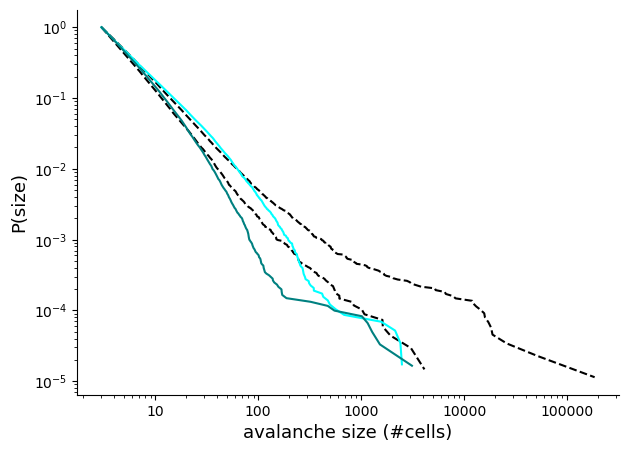

In [73]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))[:1]
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))[:1]

choose = 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')

colors = ['cyan', 'teal', 'green']
for i in range(2):
    avdistcut = av_list[i][0]
    powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i]) 

axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [74]:
av_list

[array([[3, 3, 4, ..., 3, 4, 3],
        [1, 1, 1, ..., 1, 1, 1]]),
 array([[4, 3, 3, ..., 3, 3, 4],
        [1, 1, 1, ..., 1, 1, 1]]),
 2]

In [ ]:
#PCA VAR = edges
from sklearn import decomposition

avs = ba_netsim(dist).simulate(1, 1, 0, divisor, soften, cutoff, n_sims, 1).av_mat
comp = avs.shape[0]
pca = decomposition.PCA(comp)
fit= pca.fit(avs) 
pcv = fit.explained_variance_ratio_

fig, axarr = plt.subplots(figsize = (5,5))
data = pcv
xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
yaxis = data
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = 'cyan')


avs = ba_netsim(dist).simulate(1, 5, 0, divisor, soften, cutoff, n_sims, 1).av_mat
comp = avs.shape[0]
pca = decomposition.PCA(comp)
fit= pca.fit(avs) 
pcv = fit.explained_variance_ratio_

data = pcv
xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
yaxis = data
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = 'teal')


avs = ba_netsim(dist).simulate(1, 10, 0, divisor, soften, cutoff, n_sims, 1).av_mat
comp = avs.shape[0]
pca = decomposition.PCA(comp)
fit= pca.fit(avs) 
pcv = fit.explained_variance_ratio_

data = pcv
xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
yaxis = data
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = 'blue')

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC components', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()




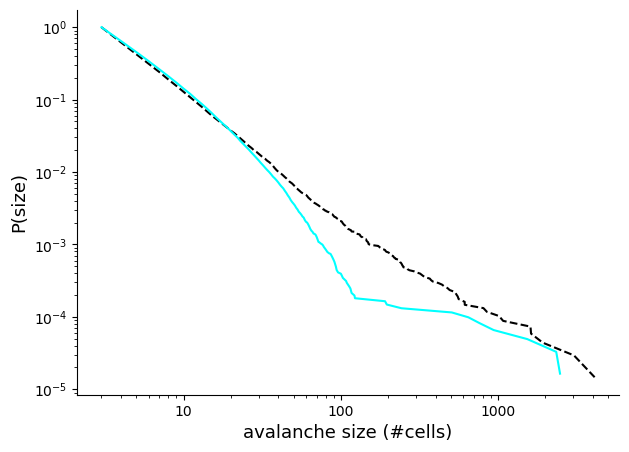

In [24]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))[:1]
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))[:1]

choose = 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')

avdistcut = av_list[1][0]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'cyan') 

axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

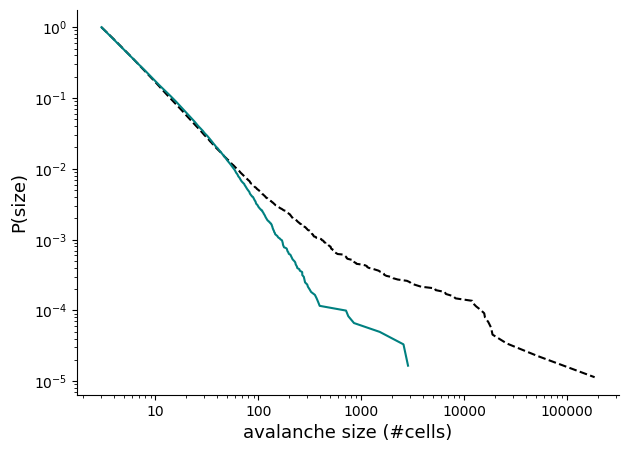

In [25]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))[:1]
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))[:1]

choose = 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')

avdistcut = av_list[0][0]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'teal') 

axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [6]:
#=======================================================================
def neighbour(coord, cnt, rng, dim): # Select which fish data to visualise
#=======================================================================
    import numpy as np
    import os
    
    #Loop through all fish
    #----------------------
        
        # Set up nearest neighbour graph
        #---------------------------------------------------------------------------
    mcs  = np.multiply(coord, dim)     # metrically scaled coordinates (in microns)
        
        # Initialise full distance matrix and nearest neighbour graph (binary) matrix
        #nearest neigh binary matrix of celln by celln storing 
        #distance of each cell to every other cell
        #---------------------------------------------------------------------------
    nnb  = np.zeros((coord.shape[0],coord.shape[0]))  
        
        # Loop through all cells to fill in distances
        #distance = matrix of celln x planen *10000 so default value is v large, 
        #outside of typical range and then will fill with distances for connected cells
        #---------------------------------------------------------------------------
    for r in range(coord.shape[0]):
        distance = np.ones((10,coord.shape[0]))*10000
        if r % round((10*coord.shape[0]/100)) == 0: 
            print("Doing row " + str(r) + " of " + str(coord.shape[0]))
            
            # moving window around r of size 3000 cells either side 
            # for each value of cell(r), each rr value (cell that is within range of cellr) 
            # a distance is calculated from cell to rrcell from their metrically scaled positions in space
            #------------------------------------------------------------------------------------
        for rr in range(max([r-int(rng/2),0]), min([r+int(rng/2),distance.shape[1]])):  
            if r == rr: distance[0,rr] = 10000  #set to 10000 ie value too large to be in range
            else:       distance[0,rr] = np.linalg.norm(mcs[r,:]-mcs[rr,:]) 
            
            #calculate binary matrix of all cells that are in range
            #--------------------------------------------------------------
        mini = np.where(distance[0,:] < np.nanpercentile(distance[0,:],cnt))[0]
        nnb[r,mini] = 1 #binary value defining whether in range or not 
    return(nnb)

In [5]:
#=======================================================================
def avalanche(nnb, bind): # duration = yes convergence (no back propagation, earliest avalanche consumes meeting avalanche, and later avalanche terminates), cells in t must be active in t+1)
#=======================================================================
    import numpy as np
    import os
    import itertools

#Calculate avalanche size + duration
#-----------------------------------
    binarray, oldav, firstav, realav, timemachine, convertav, fill, time = [],[],[],[],[],[],[],[]
    
    #LOOP THROUGH EACH FISH
    #---------------------------------
    #---------------------------------
    binarray, nnbarray, pkg = bind,nnb, np.zeros(bind.shape)
    i, marker, avcount = 0,0,0
        
    #LOOP THROUGH EACH TIME POINT
    #------------------------------
    #------------------------------
    for t in range(binarray.shape[1]-1): #loop through all time points
        if i% round(10*binarray.shape[1]/100) == 0: print('doing time step ' + str(i) + 'of' + str(binarray.shape[1]) + 'for fish ') #+ str(y))
        i = i+1
        cid = np.where(binarray[:,t] > 0)[0]  #cid = cells active at current time point
    
            
        #LOOP THROUGH EACH ACTIVE CELL
        #-------------------------------
        #-------------------------------
        for c in cid:            #loop through all active cells at this time point

            if pkg[c,t] == 0:    #only find non-marked cells
                if len(np.intersect1d(np.where(nnbarray[c,:] > 0)[0], cid) > 2): #if >2 neighbours active
                    marker = marker + 1  
                    pkg[c,t] = marker  #mark active non-marked cell with new marker value
                       

            #LOCATE ALL NEIGHBOURS
            #----------------------------
            #----------------------------
            neighbour = np.where(nnbarray[c,:] > 0)[0]  #return indeces of current cell neighbours
            neighbouron  = np.intersect1d(cid,neighbour) #indeces of active cells in t, and also neighbours of c
            where0 = np.where(pkg[neighbouron,t] == 0)[0] #neighbours not already part of an avalanche
                
            #CONVERT NEIGHBOURS WHO ARE ALREADY PART OF AN AVALANCHE
            #-------------------------------------------------------
            #-------------------------------------------------------

            if len(where0) < len(neighbouron): #if any cells are already part of another avalanche
                oldav = np.unique(pkg[neighbouron, t]) #all avalanche values from neighbours
                firstav = np.min(oldav[np.where(oldav > 0)])   #minimum avalanche value that is not 0
                    
                    #define which cells we want to combine
                realav =  oldav[np.where(oldav > 0)] #all avalanche values that are not 0
                uniteav = np.where(pkg[:,t]==realav[:,None])[1] #indeces of all cells that need to be connected
                pkg[uniteav,t] = firstav #convert all current cell neighbours and their active neighbours 
                pkg[c,t] = firstav #also convert current cell
                    
                #GO BACK IN TIME AND CONVERT
                #----------------------------
                #----------------------------
                convertav = realav[1:] #avalanche numbers needing to be converted
                if t < 30:
                    time = t-1
                
                elif t>30:
                    time = 30
                        
                for e in range(convertav.shape[0]):
                    for timemachine in range(1, time): #loop through max possible time of previous avalanche
                        fill = np.where(pkg[:,t-timemachine] == convertav[e])[0]
                        if fill.shape[0] > 0:
                            pkg[fill, t-timemachine] = firstav 
                                    
            #CONVERT NEIGHBOURS WHO ARE NOT PART OF AN AVALANCHE
            #-------------------------------------------------------
            #-------------------------------------------------------
            if len(where0) == len(neighbouron): #if all cells are not part of an avalanche
                pkg[neighbouron[where0],t] = pkg[c,t]  

            
        #SEE IF AVALANCHE CAN PROPAGATE TO NEXT TIME FRAME
        #-------------------------------------------------------
        #-------------------------------------------------------
        n_av = np.unique(pkg[:,t])  #returns the marker values for each avalanche at this time point
    
        for n in n_av: #loop through each avalanche in this time point
            if n > 0:
                cgroup = np.where(pkg[:,t] == n)[0] #cells that are in same avalanche at t
                cid2 = np.where(binarray[:,t+1] > 0) #cells in next time point that are active
                intersect = np.intersect1d(cgroup, cid2) #check if any of the same cells are active in next time point
                wherealso0 = np.where(pkg[intersect,t+1] == 0)[0] #here we find all cells that are active in both time frames, and that are not already part of another avalanche - and mark them as current avalanche
                pkg[intersect[wherealso0], t+1] = pkg[cgroup[0],t] #carry over value to next frame for those cells
      
    allmark = np.unique(pkg)[1:] #all unique marker values

    #CALCULATE AVALANCHE SIZE
    #-------------------------------------------------------
    #-------------------------------------------------------
    avsize = np.unique(pkg, return_counts = True)[1][1:] #return counts for each unique avalanche
    frameslist = np.zeros(avsize.shape[0]) #create empty frames list of same length

    #CALCULATE AVALANCHE DURATION
    #-------------------------------------------------------
    #-------------------------------------------------------
    avpertimelist = list(range(pkg.shape[1])) #empty list of length time frames

    for e in range(pkg.shape[1]): #loop through each time point in pkg
            avpertime = np.unique(pkg[:,e]) #unique marker value in each time point
            avpertimelist[e] = avpertime #fill list of unique values in each time point
                          
    #link entire recording together
    #-----------------------------------------------------------
    linktime = list(itertools.chain(*avpertimelist)) #vector of all unique marker values in each time bin linked together
    framesvec = np.unique(linktime, return_counts = True)[1][1:] #vector of number of frames for each consecutive avalanche

    #COMBINE AV SIZE AND DURATION INTO ONE ARRAY
    #-------------------------------------------------------
    #-------------------------------------------------------
    avsizecut = avsize[avsize >= 3]  #only select avalanches above 2
    avframescut = framesvec[[avsize >=3]]
    av = np.vstack((avsizecut, avframescut))      
    return(av)


In [4]:
#=====================
#=====================
class bap_netsim: 
#=====================
#=====================
    """
    Class to build barabasi-albert networks and run avalanche simulations
    dist = distance matrix between all nodes in network
    """

    #========================
    def __init__(self,dist):
    #========================
        import numpy as np
        self.dist = dist
    

    #BUILD NETWORK
    #=================
    #=================
    
    #=====================================
    def sample(self, seq, m):
    #=====================================
        """ Return m unique elements from seq.
        """
        import random
        import numpy as np
        
        #make targets a set - only contains unique elements
        targets=set()
        while len(targets)<m:
            x=random.choice(seq)
            targets.add(x) #add method only adds if x is not already in target set
        return np.array(list(targets))

    
    #=====================================
    def net_generate(self, p, edge_density):
    #=====================================
        """
        Generate Barabasi-Albert preferential attachment network. BA model starts with k initial nodes, and k edges 
        - each new node will connect to k nodes with p(number of edges already connected to each node). 
        
            edge_density = number of edges of each node
            
        """
        
        import numpy as np
        import networkx as nx
        import random
        import copy
        
        prac = nx.powerlaw_cluster_graph(self.dist.shape[0], edge_density, p)
        self.A = nx.to_numpy_array(prac)

        return(self)
    
    
    
    #CALCULATE CYCLES
    #=================
    #=================
    #===========================
    def cycles_calculate(self, edge_density):
    #===========================
        import networkx as nx
        import numpy as np
        
        cyc_mat = self.net_generate(edge_density).A #matrix to calculate cycles
        G = nx.from_numpy_matrix(cyc_mat)
        cyc = nx.algorithms.cycle_basis(G)
        edge =  int(np.sum(cyc_mat))
        self.cycles = len(cyc)
        self.edges = edge
        return(self)
    
    
    #BUILD WEIGHT MATRIX
    #===================
    #===================
    # Simple sigmoid function to 'soften' the exponential
    #===========================
    def sig(self, x):
    #===========================
        import numpy as np
        self.sig_output = 1 / (1+np.exp(-x))
        return(self)
    
    # Conversion from distance to edge weights, scaled (itself exponentially) by s
    #====================================
    def dist2edge(self, distance, divisor, soften, s):
    #===================================
        import numpy as np
        self.edge_weight_out = np.exp(s/5)*self.sig(np.exp(-soften/np.exp(s)*distance)).sig_output/divisor
        return(self)  
    
    #===========================
    def adjmat_generate(self, s, p, edge_density, divisor, soften):
    #===========================
        import numpy as np
        import copy
        mat = np.zeros((self.dist.shape))
        
        curr_mat = self.net_generate(p, edge_density).A #matrix to calculate cycles
        
        [rows, cols]    = np.where(np.triu(curr_mat) == 1) 
        for e in range(len(rows)):
            edge_weight = self.dist2edge(self.dist[rows[e], cols[e]], divisor, soften, s).edge_weight_out
            mat[rows[e], cols[e]] = edge_weight 
            mat[cols[e], rows[e]] = edge_weight
        self.adj_mat = copy.deepcopy(mat)
            
        return(self)
    
    
    
    #SIMULATE AVALANCHES
    #===================
    #===================
    
    #Find cells to propagate
    #=====================================================
    def propagate_neighbours(self, curr_mat, start_node, r_e):
    #=====================================================
        import numpy as np
        self.prop_nodes = []
        nodes = np.where(curr_mat[start_node] > 0) [0]
        weights = curr_mat[start_node][nodes]
        for f in range(len(nodes)):
            if weights[f] > np.random.uniform(0, 1):
                self.prop_nodes = np.append(self.prop_nodes, nodes[f])
                
        if r_e > np.random.uniform(0,1):
            self.prop_nodes = np.append(self.prop_nodes, start_node)
        return(self)

    
    #Simulate 
    #===========================
    def simulate(self,  s, p, edge_density, max_e, divisor, soften, cutoff, n_sims, iterate):
    #===========================
        import numpy as np
        curr_mat = self.adjmat_generate(s, p, edge_density, divisor, soften).adj_mat
        degree = sum(self.A)
        degree_scaled = (max_e/max(degree)) * degree 
        
        


        
        self.av_size = []
        self.av_dur = []
        
        #iterate simulation calculation for less-noisy distribution
        for x in range(iterate):
            
            for i in range(n_sims):
                #Decide start node
                start_node = np.random.uniform(0, curr_mat.shape[0]-1)
                down = int(start_node)
                up= int(start_node)+1
                if np.random.uniform(down, up) >= start_node:
                    start_node = up
                else:
                    start_node = down


                #Initialise avalanche - ping first node
                t_nodes = self.propagate_neighbours(curr_mat, start_node, degree_scaled[start_node]).prop_nodes #Find connected neighbours > threshold
                curr_list = t_nodes
                iterate = 'yes'

                if len(t_nodes) > 1: #must have at least 3 cells to begin avalanche
                    all_nodes = np.append(start_node, t_nodes)
                    timesteps = 1

                    while iterate == 'yes':
                        tplus_nodes = []
                        for z in range(len(curr_list)):
                            #List of all nodes active in next timestep
                            tplus_nodes = np.append(tplus_nodes, self.propagate_neighbours(curr_mat, int(curr_list[z]), degree_scaled[int(curr_list[z])]).prop_nodes)

                        all_nodes = np.append(all_nodes, tplus_nodes)
                        timesteps+=1
                        curr_list = tplus_nodes

                        if len(all_nodes) > cutoff:
                            iterate = 'no'

                        if len(tplus_nodes) == 0: #if no more active cells - stop
                            iterate = 'no'


                    self.av_size = np.append(self.av_size, len(all_nodes)) 
                    self.av_dur = np.append(self.av_dur, timesteps)

                else:
                    continue

        return(self)
    
